In [85]:
import pandas as pd
import numpy as np
from xml.dom import minidom
import re
import csv

In [2]:
directory='dataset_lat-en'

import os
if not os.path.exists(directory):
    print("making directory")
    os.makedirs(directory)

In [3]:
# !rm -rf $directory/*
# !rmdir $directory

In [4]:
!cd $directory && wget https://raw.githubusercontent.com/cltk/latin_text_perseus/master/Ammianus/opensource/amm_eng.xml
!cd $directory && wget https://raw.githubusercontent.com/cltk/latin_text_perseus/master/Ammianus/opensource/amm_lat.xml

--2019-12-07 18:31:26--  https://raw.githubusercontent.com/cltk/latin_text_perseus/master/Ammianus/opensource/amm_eng.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1717915 (1.6M) [text/plain]
Saving to: ‘amm_eng.xml’

amm_eng.xml         100%[===================>]   1.64M  9.27MB/s    in 0.2s    

2019-12-07 18:31:27 (9.27 MB/s) - ‘amm_eng.xml’ saved [1717915/1717915]

--2019-12-07 18:31:27--  https://raw.githubusercontent.com/cltk/latin_text_perseus/master/Ammianus/opensource/amm_lat.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [6]:
!ls -lah $directory

total 3.1M
drwxr-xr-x  4 jovyan users  128 Dec  7 18:31 .
drwxr-xr-x 42 jovyan users 1.4K Dec  7 18:31 ..
-rw-r--r--  1 jovyan users 1.7M Dec  7 18:31 amm_eng.xml
-rw-r--r--  1 jovyan users 1.5M Dec  7 18:31 amm_lat.xml


In [7]:
# Each Xml has
# Book in div1 tag
# Chapter in div2 tag
# milestones in milestone tag
# So, in get_text_df, we try to get than from latin and english and then create a dataframe from it

In [8]:
def get_text_df(mydoc):

    data = []

    for i, book in enumerate(mydoc.getElementsByTagName("div1")):
        #print(i)
        #print(chapter)
        book_attributes = book.attributes.items()
        #len(milestones)
        div1_attr = dict(book.attributes.items())
        div1_type = div1_attr.get('type')
        div1_n = div1_attr.get('n')

        milestone_info_arr = []
        
        for (j, chapter) in enumerate(book.getElementsByTagName("div2")):

            div2_attr = dict(chapter.attributes.items())
            div2_type = div2_attr.get('type')
            div2_n = div2_attr.get('n')
            
            milestones = chapter.toxml().split("milestone")
            
            for milestone in milestones[1:]:
                milestone_info = {}
                n = re.search(r'n="(.*?)" unit',  milestone)
                if n:
                    milestone_info['milestone_n']=n.group(1)
                else:
                    milestone_info['milestone_n']='---'

                text = milestone.split("unit=\"section\"/>")
                if len(text) ==2:
                    milestone_info['text'] = text[1]
                else:
                    milestone_info['text'] = '---'

                milestone_info['i'] = i
                milestone_info['j'] = j                
                milestone_info['div2_type'] = div2_type
                milestone_info['div2_n'] = div2_n
                milestone_info['div1_type'] = div1_type
                milestone_info['div1_n'] = div1_n                
                
               # milestone_info.update(book_attributes)

                data.append(milestone_info)

    return pd.DataFrame(data)
    

In [11]:
# parse an xml file by name
latin_doc = minidom.parse('dataset_piy/amm_lat.xml')

latin_df = get_text_df(latin_doc)
latin_df = latin_df.rename(columns={'text':'text_lat'})
latin_df = latin_df.dropna()

In [15]:
latin_df.head()

,div1_n,div1_type,div2_n,div2_type,i,j,milestone_n,text_lat
0,14,book,1,chapter,0,0,1,Post emensos insuperabilis expeditionis event...
1,14,book,1,chapter,0,0,2,Cuius acerbitati uxor grave accesserat <corr ...
2,14,book,1,chapter,0,0,3,"Eminuit autem inter humilia, supergressa iam ..."
3,14,book,1,chapter,0,0,4,"Post hoc impie perpetratum, quod in aliis quo..."
4,14,book,1,chapter,0,0,5,Nec vox accusatoris ulla (licet subditicii)\n...


In [12]:
eng_doc = minidom.parse('dataset_piy/amm_eng.xml')

In [223]:
eng_df = get_text_df(eng_doc)
eng_df = eng_df.rename(columns={'text':'text_en'})
eng_df = eng_df.dropna()

In [224]:
eng_df.head()

,div1_n,div1_type,div2_n,div2_type,i,j,milestone_n,text_en
0,14,book,1,chapter,0,0,1,After the survival of the events of an unendu...
1,14,book,1,chapter,0,0,2,To his cruelty his wife was besides a serious...
2,14,book,1,chapter,0,0,3,There stood out among their lesser atrocities...
3,14,book,1,chapter,0,0,4,"After the perpetration of this impious deed, ..."
4,14,book,1,chapter,0,0,5,"And no words of an accuser, even though bribe..."


In [225]:
eng_df.shape , latin_df.shape

((2870, 8), (2877, 8))

In [226]:
eng2_latin_df = eng_df.merge(latin_df,on=['i','j','milestone_n','div1_n','div1_type','div2_n','div2_type'] )

In [227]:
eng2_latin_df

,div1_n,div1_type,div2_n,div2_type,i,j,milestone_n,text_en,text_lat
0,14,book,1,chapter,0,0,1,After the survival of the events of an unendu...,Post emensos insuperabilis expeditionis event...
1,14,book,1,chapter,0,0,2,To his cruelty his wife was besides a serious...,Cuius acerbitati uxor grave accesserat <corr ...
2,14,book,1,chapter,0,0,3,There stood out among their lesser atrocities...,"Eminuit autem inter humilia, supergressa iam ..."
3,14,book,1,chapter,0,0,4,"After the perpetration of this impious deed, ...","Post hoc impie perpetratum, quod in aliis quo..."
4,14,book,1,chapter,0,0,5,"And no words of an accuser, even though bribe...",Nec vox accusatoris ulla (licet subditicii)\n...
5,14,book,1,chapter,0,0,6,It was further devised that sundry low-born m...,"Excogitatum est super his, ut homines quidam ..."
6,14,book,1,chapter,0,0,7,And sometimes it happened that if the head of...,"Et interdum acciderat, ut siquid in penetrali..."
7,14,book,1,chapter,0,0,8,"Moreover, his fixed purpose of ferreting out ...","<corr sic=""Adulescebat"">adolescebat</corr> au..."
8,14,book,1,chapter,0,0,9,"Finally, following an unprecedented and destr...","Novo denique perniciosoque exemplo, idem Gall..."
9,14,book,1,chapter,0,0,10,Now at that time Thalassius was the Praetoria...,Thalassius vero ea tempestate praefectus prae...


In [230]:
eng2_latin_df.text_en[0]

' After the survival of the events of an unendurable campaign,\n\n<note>Against Magnentius, who in 350 had assumed the rank of an Augustus in the west, with Veteranio; but was defeated, in 351, by Constantius at Mursa, on the river Drave, a tributary of the Danube and in the passes of the Cottian Alps in 353. His followers then abandoned him and he committed suicide. See Index.</note>\nwhen the spirits of both parties, broken by the variety of their dangers and hardships, were still drooping, before the blare of the trumpets had ceased or the soldiers been assigned to their winter quarters, the gusts of raging Fortune brought new storms upon the commonwealth through the misdeeds, many and notorious, of Gallus Caesar.\n\n<note>The title of Augustus was lawfully held only by the reigning emperor, or emperors. Caesar was the title next in rank and was conferred by the emperor on one or more of the imperial family; see Introd. p. xxiv.</note>\nHe had been raised, at the very beginning of m

In [231]:
eng2_latin_df.text_lat[0]

' Post emensos insuperabilis expeditionis eventus, languentibus partium animis, quas periculorum varietas fregerat et laborum, nondum tubarum cessante clangore, vel milite locato per statiores hibernas, fortunae saevientis procellae <corr sic="tempestales">tempestates</corr> alias rebus infudere\n\n<note><hi rend="italics">infudere,</hi> HA; <hi rend="italics">infundere,</hi> V.</note>\ncommunibus, per multa illa et dira facinora Caesaris Galli, qui ex squalore imo miseriarum, in aetatis adultae primitiis, ad <corr sic="principle">principale</corr> culmen insperato saltu\n\n<note><hi rend="italics">saltu,</hi> Kellerbauer, Kiessling; <hi rend="italics">cultu,</hi> V.</note>\nprovectus, ultra terminos  <pb id="v1.p.4"/>  potestatis delatae procurrens, asperitate nimia cuncta foedabat. Propinquitate enim regiae stirpis, gentilitateque etiam tum Constantii\n\n<note><hi rend="italics">Constantii,</hi> Lind; <hi rend="italics">Constantiani,</hi> Val; <hi rend="italics">Constantini.</hi> V.<

In [132]:
def clean_up_text(x):
    return  x.apply(lambda x: re.sub(r'\n', '',x) 
                         ).apply(lambda x: re.sub(r'\t', '',x) 
                         ).apply(lambda x: re.sub(r'<note>(.*?)</note>', '',x) 
                         ).apply(lambda x: re.sub(r'<(.*?)>', '',x)
                         ).apply(lambda x: re.sub(r'>', '',x) 
                         ).apply(lambda x: re.sub(r'<', '',x) 
                         ).apply(lambda x: re.sub(r's/^[*]{2}/','',x) 
                         ).apply(lambda x: re.sub(r's/.$//','',x)
                         ).apply(lambda x: re.sub(' +', ' ',x) 
                         ).apply(lambda x: re.sub('&quot;', '',x) 
                         )


    

In [233]:
eng2_latin_df.text_en = clean_up_text(eng2_latin_df.text_en)

eng2_latin_df.text_lat = clean_up_text(eng2_latin_df.text_lat)


In [234]:
eng2_latin_df.text_en[0]

' After the survival of the events of an unendurable campaign,when the spirits of both parties, broken by the variety of their dangers and hardships, were still drooping, before the blare of the trumpets had ceased or the soldiers been assigned to their winter quarters, the gusts of raging Fortune brought new storms upon the commonwealth through the misdeeds, many and notorious, of Gallus Caesar.He had been raised, at the very beginning of mature    manhood, by an unexpected promotion from the utmost depths of wretchedness to princely heights, and overstepping the bounds of the authority conferred upon him, by excess of violence was causing trouble everywhere. For by his relationship to the imperial stock, and the affinity which he even then had with the name of Constantius,he was raised to such a height of presumption that, if he had been more powerful, he would have ventured (it seemed) upon a course hostile to the author of his good fortune.'

In [235]:
eng2_latin_df.text_lat[0]

' Post emensos insuperabilis expeditionis eventus, languentibus partium animis, quas periculorum varietas fregerat et laborum, nondum tubarum cessante clangore, vel milite locato per statiores hibernas, fortunae saevientis procellae tempestates alias rebus infuderecommunibus, per multa illa et dira facinora Caesaris Galli, qui ex squalore imo miseriarum, in aetatis adultae primitiis, ad principale culmen insperato saltuprovectus, ultra terminos    potestatis delatae procurrens, asperitate nimia cuncta foedabat. Propinquitate enim regiae stirpis, gentilitateque etiam tum Constantiinominis, efferebatur in fastus, si plus valuisset, ausurus hostilia in auctorem suae felicitatis (ut videbatur).'

In [236]:
output_directory = directory+'/output'
if not os.path.exists(output_directory):
    print("making output directory")
    os.makedirs(output_directory)

In [29]:
eng2_latin_df.to_csv(output_directory+'/Ammianus.csv',index=False)

In [237]:
#eng2_latin_df['text_eng'].to_csv(output_directory+"/Ammianus.lat-en.en",index=False)

In [238]:
!head -n 3 $output_directory"/Ammianus.lat-en.en"

head: cannot open 'dataset_lat-en/output/Ammianus.lat-en.en' for reading: No such file or directory


In [239]:
!sed -i 's/^..//' $output_directory"/Ammianus.lat-en.en"

sed: can't read dataset_lat-en/output/Ammianus.lat-en.en: No such file or directory


In [240]:
!sed -i 's/.$//' $output_directory"/Ammianus.lat-en.en"


sed: can't read dataset_lat-en/output/Ammianus.lat-en.en: No such file or directory


In [241]:
!head -n 3 output_mapped_files/Ammianus.ita-en.en

After the survival of the events of an unendurable campaign,when the spirits of both parties, broken by the variety of their dangers and hardships, were still drooping, before the blare of the trumpets had ceased or the soldiers been assigned to their winter quarters, the gusts of raging Fortune brought new storms upon the commonwealth through the misdeeds, many and notorious, of Gallus Caesar.He had been raised, at the very beginning of mature    manhood, by an unexpected promotion from the utmost depths of wretchedness to princely heights, and overstepping the bounds of the authority conferred upon him, by excess of violence was causing trouble everywhere. For by his relationship to the imperial stock, and the affinity which he even then had with the name of Constantius,he was raised to such a height of presumption that, if he had been more powerful, he would have ventured (it seemed) upon a course hostile to the author of his good fortune.
To his cruelty his wife was besides a serio

In [243]:
df = eng2_latin_df

first_lang='lat'
sec_lang='en'
print("output_directory:",output_directory)

for lang in [first_lang,sec_lang]:

    train = df.sample(frac=0.8,random_state=1234) #random state is a seed value
    test  = df.drop(train.index)
    print(train.shape , test.shape)

    for split in ['train','test']:
        output_file_path =output_directory+"/"+split+".tags."+first_lang+"-"+sec_lang+"."+lang
        col_name='text_'+lang
        print(output_file_path)
        
        df_split = train if split=='train' else test
    
        with open(output_file_path,"w+") as f:
            df_split[[col_name]].apply(lambda x: f.write(x.values[0]+"\n"),axis=1)
            f.close()
    

output_directory: dataset_lat-en/output
(2126, 9) (532, 9)
dataset_lat-en/output/train.tags.lat-en.lat
dataset_lat-en/output/test.tags.lat-en.lat
(2126, 9) (532, 9)
dataset_lat-en/output/train.tags.lat-en.en
dataset_lat-en/output/test.tags.lat-en.en


In [244]:
!ls -la $output_directory

total 5428
drwxr-xr-x 12 jovyan users     384 Dec  7 21:54 .
drwxr-xr-x  5 jovyan users     160 Dec  7 18:40 ..
-rw-r--r--  1 jovyan users 2191058 Dec  7 18:45 Ammianus.csv
-rw-r--r--  1 jovyan users    6148 Dec  7 21:49 .DS_Store
-rw-r--r--  1 jovyan users  244079 Dec  7 21:54 test.tags.lat-en.en
-rw-r--r--  1 jovyan users  244079 Dec  7 21:49 test.tags.lat-eng.eng
-rw-r--r--  1 jovyan users  188559 Dec  7 21:54 test.tags.lat-eng.lat
-rw-r--r--  1 jovyan users  188559 Dec  7 21:54 test.tags.lat-en.lat
-rw-r--r--  1 jovyan users  949755 Dec  7 21:54 train.tags.lat-en.en
-rw-r--r--  1 jovyan users       0 Dec  7 21:54 train.tags.lat-eng.eng
-rw-r--r--  1 jovyan users  730489 Dec  7 21:54 train.tags.lat-eng.lat
-rw-r--r--  1 jovyan users  730489 Dec  7 21:54 train.tags.lat-en.lat


In [245]:
!wc -l $output_directory"/test.tags.lat-en.en"

532 dataset_lat-en/output/test.tags.lat-en.en


In [246]:
!wc -l $output_directory"/train.tags.lat-en.lat"

2126 dataset_lat-en/output/train.tags.lat-en.lat


In [100]:
!wc -l /home/jovyan/work/Documents/ibm_projects/playground_random_projects/bert-nmt-latin/examples/translation/iwslt14.tokenized.de-en/test.en


6750 /home/jovyan/work/Documents/ibm_projects/playground_random_projects/bert-nmt-latin/examples/translation/iwslt14.tokenized.de-en/test.en


In [101]:
!wc -l /home/jovyan/work/Documents/ibm_projects/playground_random_projects/bert-nmt-latin/examples/translation/iwslt14.tokenized.de-en/train.en


160239 /home/jovyan/work/Documents/ibm_projects/playground_random_projects/bert-nmt-latin/examples/translation/iwslt14.tokenized.de-en/train.en


In [96]:
!pwd

/home/jovyan/work/Documents/ibm_projects/playground_random_projects/bert-nmt-latin


# Get ready to increase the size of the training data
# More resources: 
## https://github.com/cltk/latin_text_perseus/tree/master/Caesar/opensource

## https://github.com/cltk/latin_text_perseus/tree/master/Catullus/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Celsus/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Gellius/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Horace/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Livy/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Lucan/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Ovid/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Petronius/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Plautus/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Pliny/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Quintilian/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Sallust/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Seneca/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Suetonius/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Terence/opensource
## https://github.com/cltk/latin_text_perseus/tree/master/Vergil/opensource
## 

In [247]:
!git clone https://github.com/cltk/latin_text_perseus

Cloning into 'latin_text_perseus'...
remote: Enumerating objects: 1461, done.
remote: Total 1461 (delta 0), reused 0 (delta 0), pack-reused 1461
Receiving objects: 100% (1461/1461), 303.30 MiB | 6.21 MiB/s, done.
Resolving deltas: 100% (175/175), done.
Checking out files: 100% (1148/1148), done.


In [3]:
latin_text_perseus_dir = 'latin_text_perseus'

english_translated_file = []

for dirpath, dirnames, filenames in os.walk(latin_text_perseus_dir):
    for filename in filenames:
        if ('_en' in filename) and not ('.json' in filename):
            english_translated_file.append(dirpath+"/"+filename)
            print(english_translated_file[-1])
    
    

latin_text_perseus/Seneca/opensource/sen.apoc_eng.xml
latin_text_perseus/Celsus/opensource/cels_eng.xml
latin_text_perseus/Quintilian/opensource/quint.butler4-6_eng.xml
latin_text_perseus/Quintilian/opensource/quint.butler1-3_eng.xml
latin_text_perseus/Quintilian/opensource/quint.butler10-12_eng.xml
latin_text_perseus/Quintilian/opensource/quint.butler7-9_eng.xml
latin_text_perseus/Caesar/opensource/caes.bg_eng.xml
latin_text_perseus/Caesar/opensource/caes.bc_eng.xml
latin_text_perseus/Caesar/opensource/ag.caes.bg_eng.xml
latin_text_perseus/Sallust/opensource/sallust.catil_eng.xml
latin_text_perseus/Sallust/opensource/sallust.jugur_eng.xml
latin_text_perseus/Pliny/opensource/pliny.maj.nh_eng.xml
latin_text_perseus/Suetonius/opensource/suet.thomson_eng.xml
latin_text_perseus/Ovid/opensource/ovid.am_eng.xml
latin_text_perseus/Ovid/opensource/ovid.golding.met_eng.xml
latin_text_perseus/Ovid/opensource/ovid.her_eng.xml
latin_text_perseus/Ovid/opensource/ovid.simm.met_eng.xml
latin_text_per

In [4]:
translation_map = []

for eng_file in english_translated_file:
    lat_file = re.sub('_eng','_lat',eng_file)
    if os.path.exists(lat_file):
        translation_map.append(
        {
            'en':eng_file,
            'lat':lat_file
        }
        )
        
    

In [5]:
translation_map

[{'en': 'latin_text_perseus/Seneca/opensource/sen.apoc_eng.xml',
  'lat': 'latin_text_perseus/Seneca/opensource/sen.apoc_lat.xml'},
 {'en': 'latin_text_perseus/Celsus/opensource/cels_eng.xml',
  'lat': 'latin_text_perseus/Celsus/opensource/cels_lat.xml'},
 {'en': 'latin_text_perseus/Quintilian/opensource/quint.butler4-6_eng.xml',
  'lat': 'latin_text_perseus/Quintilian/opensource/quint.butler4-6_lat.xml'},
 {'en': 'latin_text_perseus/Quintilian/opensource/quint.butler1-3_eng.xml',
  'lat': 'latin_text_perseus/Quintilian/opensource/quint.butler1-3_lat.xml'},
 {'en': 'latin_text_perseus/Quintilian/opensource/quint.butler10-12_eng.xml',
  'lat': 'latin_text_perseus/Quintilian/opensource/quint.butler10-12_lat.xml'},
 {'en': 'latin_text_perseus/Quintilian/opensource/quint.butler7-9_eng.xml',
  'lat': 'latin_text_perseus/Quintilian/opensource/quint.butler7-9_lat.xml'},
 {'en': 'latin_text_perseus/Caesar/opensource/caes.bg_eng.xml',
  'lat': 'latin_text_perseus/Caesar/opensource/caes.bg_lat.x

In [6]:
len(translation_map)

51

In [28]:
master_translation_df = pd.DataFrame()

for translation_map_id, translation in enumerate(translation_map):

    # parse an xml file by name
    latin_doc = minidom.parse(translation['lat'])

    latin_df = get_text_df(latin_doc)
    latin_df = latin_df.rename(columns={'text':'text_lat'})
    latin_df = latin_df.dropna()

    
    eng_doc = minidom.parse(translation['en'])
    eng_df = get_text_df(eng_doc)
    eng_df = eng_df.rename(columns={'text':'text_en'})
    eng_df = eng_df.dropna()


    print(translation_map_id, translation['en'], eng_df.shape , latin_df.shape)
    
    if (eng_df.shape[0]>0) and (latin_df.shape[0]>0):
        print("merging..")
        eng2_latin_df = eng_df.merge(latin_df,on=['i','j','milestone_n','div1_n','div1_type','div2_n','div2_type'] )
        eng2_latin_df['translation_eng'] = translation['en']

        master_translation_df=master_translation_df.append(eng2_latin_df)
    

0 latin_text_perseus/Seneca/opensource/sen.apoc_eng.xml (0, 0) (0, 0)
1 latin_text_perseus/Celsus/opensource/cels_eng.xml (0, 0) (0, 0)
2 latin_text_perseus/Quintilian/opensource/quint.butler4-6_eng.xml (0, 0) (0, 0)
3 latin_text_perseus/Quintilian/opensource/quint.butler1-3_eng.xml (0, 0) (0, 0)
4 latin_text_perseus/Quintilian/opensource/quint.butler10-12_eng.xml (0, 0) (0, 0)
5 latin_text_perseus/Quintilian/opensource/quint.butler7-9_eng.xml (0, 0) (0, 0)
6 latin_text_perseus/Caesar/opensource/caes.bg_eng.xml (0, 0) (0, 0)
7 latin_text_perseus/Caesar/opensource/caes.bc_eng.xml (0, 0) (1187, 8)
8 latin_text_perseus/Sallust/opensource/sallust.catil_eng.xml (0, 0) (0, 0)
9 latin_text_perseus/Sallust/opensource/sallust.jugur_eng.xml (0, 0) (0, 0)
10 latin_text_perseus/Ovid/opensource/ovid.am_eng.xml (0, 0) (0, 0)
11 latin_text_perseus/Ovid/opensource/ovid.met_eng.xml (0, 0) (0, 0)
12 latin_text_perseus/Terence/opensource/eu_eng.xml (125, 8) (0, 0)
13 latin_text_perseus/Terence/opensource

In [29]:
master_translation_df.shape

(3327, 10)

In [32]:
master_translation_df

,div1_n,div1_type,div2_n,div2_type,i,j,milestone_n,text_en,text_lat,translation_eng
0,1,book,1,poem,0,0,61,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
1,1,book,2,poem,0,1,64,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
2,1,book,3,poem,0,2,38,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
3,1,book,3,poem,0,2,76,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
4,1,book,4,poem,0,3,39,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
5,1,book,4,poem,0,3,63,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
6,1,book,4,poem,0,3,113,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
7,1,book,5,poem,0,4,39,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
8,1,book,5,poem,0,4,86,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...
9,1,book,6,poem,0,5,65,---,---,latin_text_perseus/Horace/opensource/hor.sat_e...


In [47]:
# Create data with assumption that all will have miles in the right order

In [397]:
def get_text_df_using_milestones(mydoc,debug=False):
    

    data = []
    
    
    num_of_milestones = mydoc.getElementsByTagName("milestone")
    print("num_of_milestones",len(num_of_milestones))
    
    num_of_div2 = mydoc.getElementsByTagName("div2")
    print("num_of_div2",len(num_of_div2))  
    

    num_of_div1 = mydoc.getElementsByTagName("div1")
    print("num_of_div1",len(num_of_div1))  
    
    #return pd.DataFrame()
    no_div1=False
    div1_list = mydoc.getElementsByTagName("div1")
    if len(div1_list)==0:
        div1_list = [mydoc]
        no_div1=True

    for i, book in enumerate(div1_list):
        #print(i)
        #print(chapter)
        if debug==True:
            print("in div1_list loop",i)
        
        if  book.attributes:
            div1_attr = dict(book.attributes.items())
            div1_type = div1_attr.get('type')
            div1_n = div1_attr.get('n')
            
        else:
            div1_type = 'not_available'
            div1_n ='not_available'
            
        if debug==True:
            print("in div1_list loop:div1_type,div1_n",div1_type,div1_n)


        milestone_info_arr = []
        
        
        div2_list = mydoc.getElementsByTagName("div2")
        no_div2=False        
        if len(div2_list)==0:
            div2_list = [book]
            no_div2=True
        
        
        for (j, chapter) in enumerate(div2_list):
            
            if debug==True:
                print("in div2_list loop",j)            
                
            if  chapter.attributes:
                div2_attr = dict(chapter.attributes.items())
                div2_type = div2_attr.get('type')
                div2_n = div1_attr.get('n')
            else:
                div2_type = 'not_available'
                div2_n ='not_available'    
                
            
            milestone_split = chapter.toxml().split("<milestone")
            
            no_milestones=  True if len(chapter.getElementsByTagName("milestone")) ==0 else False
                        
            if no_milestones:
                #milestones = [chapter] 
                # div2 is divided into <p>s in this case
                milestones = chapter.getElementsByTagName("p") #toxml().split("milestone")
                #no_milestones=True
                                
                if debug==True:
                    print("no milestones found")   
                    
                    print("number of p found:",len(milestones))
                    
                
            else:
               # no_milestones=False
                milestones = milestone_split[1:]
                
                if debug==True:
                    print("using split_milestone")
                #print(milestone_split)
                #break
                
                
            
            for (k, milestone) in enumerate(milestones):
                
                if debug==True:
                    print("innermost loop") 
                
                milestone_info = {}
                if not isinstance(milestone, str):
                    milestone = milestone.toprettyxml()
                    
                n = re.search(r'n="(.*?)" unit',  milestone)
                if n:
                    milestone_info['milestone_n']=n.group(1)
                else:
                    milestone_info['milestone_n']='---'

                text = milestone.split("unit=\"section\"/>")
                if len(text) ==2:
                    milestone_info['text'] = text[1]
                else:
                    if no_milestones==False:
                        milestone_info['text'] = '---'
                    else:
                        milestone_info['text'] = milestone
                    

                milestone_info['i'] = i
                milestone_info['j'] = j                
                milestone_info['k'] = k     
            
                milestone_info['div2_type'] = div2_type
                milestone_info['div2_n'] = div2_n
                milestone_info['div1_type'] = div1_type
                milestone_info['div1_n'] = div1_n                
                
               # milestone_info.update(book_attributes)

                data.append(milestone_info)

                
    return pd.DataFrame(data) , no_div1 , no_div2 , no_milestones


In [498]:
master_translation_df = pd.DataFrame()

for translation_map_id, translation in enumerate(translation_map):

    # parse an xml file by name
    latin_doc = minidom.parse(translation['lat'])

    latin_df , no_div1_lat , no_div2_lat, no_milestone_lat = get_text_df_using_milestones(latin_doc)
    latin_df = latin_df.rename(columns={'text':'text_lat'})
    latin_df = latin_df.dropna()

    
    eng_doc  = minidom.parse(translation['en'])
    eng_df, no_div1_eng , no_div2_eng, no_milestone_eng  = get_text_df_using_milestones(eng_doc)
    eng_df = eng_df.rename(columns={'text':'text_en'})
    eng_df = eng_df.dropna()


    print(translation_map_id, translation['en'], eng_df.shape , latin_df.shape)
    print(" no_div1_eng:{%r} , no_div2_eng:{%r}, no_milestone_eng:{%r}"%(no_div1_eng,no_div2_eng, no_milestone_eng))
    print(" no_div1_lat:{%r} , no_div2_lat:{%r}, no_milestone_lat:{%r}"%(no_div1_lat,no_div2_lat, no_milestone_lat))
    
    
    if (eng_df.shape[0]>0) and (latin_df.shape[0]>0):
    
        merge_keys = ['i','j','k','milestone_n','div1_n','div1_type','div2_n','div2_type']
    
        # Only milestones is available
        if (no_div1_eng) and (no_div1_lat) and (no_div2_eng) and (no_div2_lat) and not(no_milestone_eng) and not(no_milestone_lat):
            merge_keys = [ 'i','j','k']
            
        #  div2 not available
        if not(no_div1_eng) and not(no_div1_lat) and (no_div2_eng) and (no_div2_lat) and not(no_milestone_eng) and not(no_milestone_lat):
            merge_keys = ['div1_n','div2_n', 'milestone_n' ,'k']
    
        # edge_cases:
        
        if 'sen.apoc_eng.xml' in translation['en']:
            merge_keys = [ 'milestone_n']

        print("using merge_keys",merge_keys)
        eng2_latin_df = eng_df.merge(latin_df,on=merge_keys , suffixes=('_en','_lat') )        
        eng2_latin_df['translation_eng'] = translation['en']
        eng2_latin_df['translation_lat'] = translation['lat']
        
        print("merging..")
        print(eng2_latin_df.shape)
        
#         if (eng2_latin_df.shape[0] ==0 ) and eng_df.shape[0]!=0:
#             print("remerging because shape was 0")
#             eng_df.shape[0]
            

        master_translation_df=master_translation_df.append(eng2_latin_df)

master_translation_df = master_translation_df.drop(master_translation_df[master_translation_df.text_en=='---'].index)
master_translation_df = master_translation_df.drop(master_translation_df[master_translation_df.text_lat=='---'].index)


master_translation_df.text_en = clean_up_text(master_translation_df.text_en)
master_translation_df.text_lat = clean_up_text(master_translation_df.text_lat)




num_of_milestones 13
num_of_div2 0
num_of_div1 0
num_of_milestones 14
num_of_div2 0
num_of_div1 1
0 latin_text_perseus/Seneca/opensource/sen.apoc_eng.xml (14, 9) (13, 9)
 no_div1_eng:{False} , no_div2_eng:{True}, no_milestone_eng:{False}
 no_div1_lat:{True} , no_div2_lat:{True}, no_milestone_lat:{False}
using merge_keys ['milestone_n']
merging..
(13, 19)
num_of_milestones 0
num_of_div2 211
num_of_div1 8
num_of_milestones 0
num_of_div2 211
num_of_div1 8
1 latin_text_perseus/Celsus/opensource/cels_eng.xml (5896, 9) (5880, 9)
 no_div1_eng:{False} , no_div2_eng:{False}, no_milestone_eng:{True}
 no_div1_lat:{False} , no_div2_lat:{False}, no_milestone_lat:{True}
using merge_keys ['i', 'j', 'k', 'milestone_n', 'div1_n', 'div1_type', 'div2_n', 'div2_type']
merging..
(5880, 12)
num_of_milestones 919
num_of_div2 0
num_of_div1 3


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


num_of_milestones 915
num_of_div2 0
num_of_div1 3
2 latin_text_perseus/Quintilian/opensource/quint.butler4-6_eng.xml (915, 9) (919, 9)
 no_div1_eng:{False} , no_div2_eng:{True}, no_milestone_eng:{False}
 no_div1_lat:{False} , no_div2_lat:{True}, no_milestone_lat:{False}
using merge_keys ['div1_n', 'div2_n', 'milestone_n', 'k']
merging..
(186, 16)
num_of_milestones 1113
num_of_div2 0
num_of_div1 4
num_of_milestones 1099
num_of_div2 0
num_of_div1 4
3 latin_text_perseus/Quintilian/opensource/quint.butler1-3_eng.xml (1099, 9) (1113, 9)
 no_div1_eng:{False} , no_div2_eng:{True}, no_milestone_eng:{False}
 no_div1_lat:{False} , no_div2_lat:{True}, no_milestone_lat:{False}
using merge_keys ['div1_n', 'div2_n', 'milestone_n', 'k']
merging..
(576, 16)
num_of_milestones 875
num_of_div2 0
num_of_div1 3
num_of_milestones 882
num_of_div2 0
num_of_div1 3
4 latin_text_perseus/Quintilian/opensource/quint.butler10-12_eng.xml (882, 9) (875, 9)
 no_div1_eng:{False} , no_div2_eng:{True}, no_milestone_eng:{

num_of_milestones 3975
num_of_div2 797
num_of_div1 41
num_of_milestones 662
num_of_div2 796
num_of_div1 41
23 latin_text_perseus/Gellius/opensource/gel_eng.xml (43460, 9) (180031, 9)
 no_div1_eng:{False} , no_div2_eng:{False}, no_milestone_eng:{False}
 no_div1_lat:{False} , no_div2_lat:{False}, no_milestone_lat:{False}
using merge_keys ['i', 'j', 'k', 'milestone_n', 'div1_n', 'div1_type', 'div2_n', 'div2_type']
merging..
(26978, 12)
num_of_milestones 74
num_of_div2 0
num_of_div1 10
num_of_milestones 74
num_of_div2 0
num_of_div1 10
24 latin_text_perseus/Lucan/opensource/pharsalia_eng.xml (74, 9) (74, 9)
 no_div1_eng:{False} , no_div2_eng:{True}, no_milestone_eng:{False}
 no_div1_lat:{False} , no_div2_lat:{True}, no_milestone_lat:{False}
using merge_keys ['div1_n', 'div2_n', 'milestone_n', 'k']
merging..
(72, 16)
num_of_milestones 0
num_of_div2 15
num_of_div1 5
num_of_milestones 118
num_of_div2 20
num_of_div1 6
25 latin_text_perseus/Plautus/opensource/pl.am_eng.xml (720, 9) (0, 0)
 no_di

num_of_milestones 2877
num_of_div2 216
num_of_div1 20
num_of_milestones 2868
num_of_div2 217
num_of_div1 20
49 latin_text_perseus/Ammianus/opensource/amm_eng.xml (57400, 9) (57540, 9)
 no_div1_eng:{False} , no_div2_eng:{False}, no_milestone_eng:{False}
 no_div1_lat:{False} , no_div2_lat:{False}, no_milestone_lat:{False}
using merge_keys ['i', 'j', 'k', 'milestone_n', 'div1_n', 'div1_type', 'div2_n', 'div2_type']
merging..
(48963, 12)
num_of_milestones 173
num_of_div2 26
num_of_div1 3
num_of_milestones 169
num_of_div2 26
num_of_div1 3
50 latin_text_perseus/Petronius/opensource/petr_eng.xml (99, 9) (84, 9)
 no_div1_eng:{False} , no_div2_eng:{False}, no_milestone_eng:{True}
 no_div1_lat:{False} , no_div2_lat:{False}, no_milestone_lat:{True}
using merge_keys ['i', 'j', 'k', 'milestone_n', 'div1_n', 'div1_type', 'div2_n', 'div2_type']
merging..
(81, 12)


In [499]:
master_translation_df.shape

(86557, 28)

In [401]:
output_directory = directory+'/output'

In [402]:
output_directory

'dataset_lat-en/output'

In [404]:
master_translation_df.to_csv(output_directory+"/master_translation_df.csv",index=False)

In [405]:
df = master_translation_df

first_lang='lat'
sec_lang='en'
print("output_directory:",output_directory)

for lang in [first_lang,sec_lang]:

    train = df.sample(frac=0.8,random_state=1234) #random state is a seed value
    test  = df.drop(train.index)
    print(train.shape , test.shape)

    for split in ['train','test']:
        output_file_path =output_directory+"/"+split+".tags."+first_lang+"-"+sec_lang+"."+lang
        col_name='text_'+lang
        print(output_file_path)
        
        df_split = train if split=='train' else test
    
        with open(output_file_path,"w+") as f:
            df_split[[col_name]].apply(lambda x: f.write(x.values[0]+"\n"),axis=1)
            f.close()
    

output_directory: dataset_lat-en/output
(69246, 28) (5956, 28)
dataset_lat-en/output/train.tags.lat-en.lat
dataset_lat-en/output/test.tags.lat-en.lat
(69246, 28) (5956, 28)
dataset_lat-en/output/train.tags.lat-en.en
dataset_lat-en/output/test.tags.lat-en.en


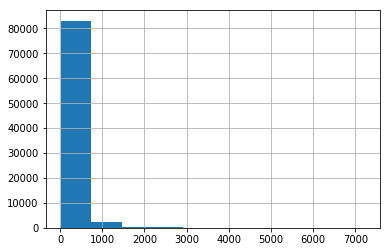

In [409]:
%matplotlib inline
master_translation_df.text_lat.apply(lambda x: len(x)).hist()

In [413]:
master_translation_df.text_lat.apply(lambda x: len(x)).value_counts(bins=10)

(9.787, 738.2]      83101
(738.2, 1459.4]      2431
(1459.4, 2180.6]      492
(2180.6, 2901.8]      271
(2901.8, 3623.0]       79
(3623.0, 4344.2]       77
(4344.2, 5065.4]       57
(6507.8, 7229.0]       28
(5065.4, 5786.6]       14
(5786.6, 6507.8]        7
Name: text_lat, dtype: int64

In [414]:
master_translation_df.text_en.apply(lambda x: len(x)).value_counts(bins=10)

(-0.93, 1809.9]       80473
(1809.9, 3602.8]       4048
(3602.8, 5395.7]       1297
(5395.7, 7188.6]        457
(7188.6, 8981.5]        155
(8981.5, 10774.4]        87
(16153.1, 17946.0]       40
(14360.2, 16153.1]        0
(12567.3, 14360.2]        0
(10774.4, 12567.3]        0
Name: text_en, dtype: int64

In [417]:
master_translation_df.shape

(86557, 28)

In [418]:
master_translation_df = master_translation_df[master_translation_df.text_lat.apply(lambda x: len(x)) < 3800]
master_translation_df = master_translation_df[master_translation_df.text_en.apply(lambda x: len(x)) < 3800]

In [419]:
master_translation_df.shape

(84763, 28)

In [420]:
df = master_translation_df

first_lang='lat'
sec_lang='en'
print("output_directory:",output_directory)

for lang in [first_lang,sec_lang]:

    train = df.sample(frac=0.8,random_state=1234) #random state is a seed value
    test  = df.drop(train.index)
    print(train.shape , test.shape)

    for split in ['train','test']:
        output_file_path =output_directory+"/"+split+".tags."+first_lang+"-"+sec_lang+"."+lang
        col_name='text_'+lang
        print(output_file_path)
        
        df_split = train if split=='train' else test
    
        with open(output_file_path,"w+") as f:
            df_split[[col_name]].apply(lambda x: f.write(x.values[0]+"\n"),axis=1)
            f.close()
            

output_directory: dataset_lat-en/output
(67810, 28) (6195, 28)
dataset_lat-en/output/train.tags.lat-en.lat
dataset_lat-en/output/test.tags.lat-en.lat
(67810, 28) (6195, 28)
dataset_lat-en/output/train.tags.lat-en.en
dataset_lat-en/output/test.tags.lat-en.en


In [442]:
master_translation_df = master_translation_df[master_translation_df.text_lat.apply(lambda x: len(x)) < 1000]
master_translation_df = master_translation_df[master_translation_df.text_en.apply(lambda x: len(x)) < 1000]

In [443]:
master_translation_df.text_en.apply(lambda x: len(x)).value_counts(bins=10)

(310.7, 408.6]    12674
(212.8, 310.7]    12084
(408.6, 506.5]    11313
(114.9, 212.8]    10512
(506.5, 604.4]     9035
(604.4, 702.3]     6605
(16.02, 114.9]     6049
(702.3, 800.2]     3454
(800.2, 898.1]     2337
(898.1, 996.0]     1105
Name: text_en, dtype: int64

In [444]:
df = master_translation_df

first_lang='lat'
sec_lang='en'
print("output_directory:",output_directory)

for lang in [first_lang,sec_lang]:

    train = df.sample(frac=0.8,random_state=1234) #random state is a seed value
    test  = df.drop(train.index)
    print(train.shape , test.shape)

    for split in ['train','test']:
        output_file_path =output_directory+"/"+split+".tags."+first_lang+"-"+sec_lang+"."+lang
        col_name='text_'+lang
        print(output_file_path)
        
        df_split = train if split=='train' else test
    
        with open(output_file_path,"w+") as f:
            df_split[[col_name]].apply(lambda x: f.write(x.values[0]+"\n"),axis=1)
            f.close()
            
            

output_directory: dataset_lat-en/output
(60134, 28) (6869, 28)
dataset_lat-en/output/train.tags.lat-en.lat
dataset_lat-en/output/test.tags.lat-en.lat
(60134, 28) (6869, 28)
dataset_lat-en/output/train.tags.lat-en.en
dataset_lat-en/output/test.tags.lat-en.en


In [446]:
master_translation_df_backup_lt_1000 = master_translation_df

In [447]:
master_translation_df = master_translation_df[master_translation_df.text_lat.apply(lambda x: len(x)) < 300]
master_translation_df = master_translation_df[master_translation_df.text_en.apply(lambda x: len(x)) <  300]


In [448]:
df = master_translation_df

first_lang='lat'
sec_lang='en'
print("output_directory:",output_directory)

for lang in [first_lang,sec_lang]:

    train = df.sample(frac=0.8,random_state=1234) #random state is a seed value
    test  = df.drop(train.index)
    print(train.shape , test.shape)

    for split in ['train','test']:
        output_file_path =output_directory+"/"+split+".tags."+first_lang+"-"+sec_lang+"."+lang
        col_name='text_'+lang
        print(output_file_path)
        
        df_split = train if split=='train' else test
    
        with open(output_file_path,"w+") as f:
            df_split[[col_name]].apply(lambda x: f.write(x.values[0]+"\n"),axis=1)
            f.close()
            
            

output_directory: dataset_lat-en/output
(21554, 28) (4063, 28)
dataset_lat-en/output/train.tags.lat-en.lat
dataset_lat-en/output/test.tags.lat-en.lat
(21554, 28) (4063, 28)
dataset_lat-en/output/train.tags.lat-en.en
dataset_lat-en/output/test.tags.lat-en.en


In [450]:
master_translation_df['en_sentences-count']=master_translation_df.text_en.apply(lambda x: len(x.split('.')))

In [451]:
master_translation_df['lat_sentences-count']=master_translation_df.text_lat.apply(lambda x: len(x.split('.')))

In [453]:
(master_translation_df['en_sentences-count'] == master_translation_df['lat_sentences-count']).value_counts()

True     18526
False     8416
dtype: int64

In [464]:
master_translation_df['text_en_split'] = master_translation_df.text_en.apply(lambda x: x.split('.'))

In [465]:
master_translation_df['text_lat_split'] = master_translation_df.text_lat.apply(lambda x: x.split('.'))

In [466]:
master_translation_df

,div1_n,div1_n_en,div1_n_lat,div1_type,div1_type_en,div1_type_lat,div2_n,div2_n_en,div2_n_lat,div2_type,...,milestone_n_en,milestone_n_lat,text_en,text_lat,translation_eng,translation_lat,en_sentences-count,lat_sentences-count,text_en_split,text_lat_split
705,1,NaN,NaN,book,NaN,NaN,1,NaN,NaN,chapter,...,NaN,NaN,. . . But if there is any fracture at the top...,. . . Quod si ex summo cubito quid fractum si...,latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,6,6,"[ , , , But if there is any fracture at the...","[ , , , Quod si ex summo cubito quid fractu..."
707,1,NaN,NaN,book,NaN,NaN,1,NaN,NaN,chapter,...,NaN,NaN,"For a finger, it is enough to bandage it to a...",Digitum satis est ad unum surculum post infla...,latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,2,"[ For a finger, it is enough to bandage it to ...",[ Digitum satis est ad unum surculum post infl...
733,1,NaN,NaN,book,NaN,NaN,1,NaN,NaN,chapter,...,NaN,NaN,24 For the toes the same treatment is required...,24 In digitis nihil ultra fieri debet quam quo...,latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,3,3,[24 For the toes the same treatment is require...,[24 In digitis nihil ultra fieri debet quam qu...
739,2,NaN,NaN,book,NaN,NaN,2,NaN,NaN,chapter,...,NaN,NaN,"They, then, who profess a reasoned theory of ...","Igitur ii, qui rationalem medicinam profitent...",latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,2,"[ They, then, who profess a reasoned theory of...","[ Igitur ii, qui rationalem medicinam profiten..."
741,2,NaN,NaN,book,NaN,NaN,2,NaN,NaN,chapter,...,NaN,NaN,"But they call evident those causes, concernin...","Evidentes vero has appellant, in quibus quaeru...",latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,2,"[ But they call evident those causes, concerni...","[Evidentes vero has appellant, in quibus quaer..."
753,2,NaN,NaN,book,NaN,NaN,2,NaN,NaN,chapter,...,NaN,NaN,With these premises I will first speak of how ...,"His propositis, primum (lib. I) dicam, quemadm...",latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,5,[With these premises I will first speak of how...,"[His propositis, primum (lib, I) dicam, quema..."
786,2,NaN,NaN,book,NaN,NaN,2,NaN,NaN,chapter,...,NaN,NaN,"But summer, while not wholly exempt from most...",At aestas non quidem vacat plerisque his morb...,latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,2,"[ But summer, while not wholly exempt from mos...",[ At aestas non quidem vacat plerisque his mor...
788,2,NaN,NaN,book,NaN,NaN,2,NaN,NaN,chapter,...,NaN,NaN,"Winter provokes headache, coughs, and all the ...","Hiemps autem capitis dolores, tussim et quicqu...",latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,2,"[Winter provokes headache, coughs, and all the...","[Hiemps autem capitis dolores, tussim et quicq..."
799,2,NaN,NaN,book,NaN,NaN,2,NaN,NaN,chapter,...,NaN,NaN,8 It follows now that I have to explain the sp...,"8. Sequitur, ut in quoque morbi genere propria...",latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,3,[8 It follows now that I have to explain the s...,"[8, Sequitur, ut in quoque morbi genere propr..."
800,2,NaN,NaN,book,NaN,NaN,2,NaN,NaN,chapter,...,NaN,NaN,"When there is pain in the bladder, if purulent...",Ex vesica dolenti si purulenta urina processit...,latin_text_perseus/Celsus/opensource/cels_eng.xml,latin_text_perseus/Celsus/opensource/cels_lat.xml,2,2,"[When there is pain in the bladder, if purulen...",[Ex vesica dolenti si purulenta urina processi...


In [467]:
potiential_breaking_translation = master_translation_df[(master_translation_df['en_sentences-count'] == master_translation_df['lat_sentences-count'])]

In [ ]:
#https://stackoverflow.com/questions/38372016/split-nested-array-values-from-pandas-dataframe-cell-over-multiple-rows

In [471]:
pd.DataFrame(potiential_breaking_translation.apply(pd.Series).stack()).shape

(296416, 1)

In [481]:
!pip install tqdm

    100% |████████████████████████████████| 61kB 1.4MB/s ta 0:00:01


# Breaking longer sentences into saller ones

In [519]:
df = master_translation_df

broken_down_sentences_df = pd.DataFrame()

from tqdm import tqdm_notebook as tqdm

for i in tqdm(range(df.shape[0])):
    en_sentences = df.iloc[i]['text_en'].split(".")
    lat_sentences = df.iloc[i]['text_lat'].split(".")
    
    if len(en_sentences) == len(lat_sentences):
        for j in range(len(en_sentences)):
            #print(en_sentences[j])
            if (len(en_sentences[j]) < 5 ) or (len(lat_sentences[j]) < 5):
                # ignore very small sentence
                continue
            else:
                broken_down_sentences_df = broken_down_sentences_df.append({
                        'text_en': en_sentences[j],
                        'text_lat': lat_sentences[j]
                    },ignore_index=True)
                
                
    else:
        broken_down_sentences_df = broken_down_sentences_df.append({
            'text_en': df.iloc[i]['text_en'],
            'text_lat': df.iloc[i]['text_lat']
        },ignore_index=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [501]:
broken_down_sentences_df.shape , master_translation_df.shape

((111264, 2), (86557, 28))

In [508]:
broken_down_sentences_df.text_en.apply(lambda x: len(x)).value_counts(bins=40,normalize=True)

(-17.947000000000003, 448.65]    0.703273
(448.65, 897.3]                  0.192147
(897.3, 1345.95]                 0.030324
(1345.95, 1794.6]                0.021355
(2243.25, 2691.9]                0.010138
(1794.6, 2243.25]                0.010048
(2691.9, 3140.55]                0.008673
(3140.55, 3589.2]                0.005932
(3589.2, 4037.85]                0.004404
(4037.85, 4486.5]                0.002840
(4486.5, 4935.15]                0.002346
(5383.8, 5832.45]                0.001887
(4935.15, 5383.8]                0.001878
(6281.1, 6729.75]                0.001438
(8075.7, 8524.35]                0.000845
(7178.4, 7627.05]                0.000485
(5832.45, 6281.1]                0.000360
(7627.05, 8075.7]                0.000360
(17497.35, 17946.0]              0.000360
(9421.65, 9870.3]                0.000360
(9870.3, 10318.95]               0.000360
(8973.0, 9421.65]                0.000063
(6729.75, 7178.4]                0.000063
(8524.35, 8973.0]                0

In [509]:
broken_down_sentences_df.text_lat.apply(lambda x: len(x)).value_counts(bins=40,normalize=True)

(-7.23, 180.725]       0.436260
(180.725, 361.45]      0.365239
(361.45, 542.175]      0.131840
(542.175, 722.9]       0.041415
(722.9, 903.625]       0.011720
(903.625, 1084.35]     0.003280
(1265.075, 1445.8]     0.001465
(1084.35, 1265.075]    0.001348
(1445.8, 1626.525]     0.001186
(1626.525, 1807.25]    0.001016
(1807.25, 1987.975]    0.000584
(2168.7, 2349.425]     0.000566
(2530.15, 2710.875]    0.000458
(2710.875, 2891.6]     0.000449
(1987.975, 2168.7]     0.000440
(2349.425, 2530.15]    0.000440
(4518.125, 4698.85]    0.000261
(3072.325, 3253.05]    0.000252
(3433.775, 3614.5]     0.000198
(3975.95, 4156.675]    0.000189
(4156.675, 4337.4]     0.000189
(4337.4, 4518.125]     0.000189
(3253.05, 3433.775]    0.000135
(3614.5, 3795.225]     0.000126
(3795.225, 3975.95]    0.000126
(2891.6, 3072.325]     0.000126
(6867.55, 7048.275]    0.000126
(5421.75, 5602.475]    0.000063
(6506.1, 6686.825]     0.000063
(6325.375, 6506.1]     0.000063
(5602.475, 5783.2]     0.000063
(7048.27

In [513]:
broken_down_sentences_df.text_lat.apply(lambda x: len(x)< 300).value_counts(normalize=True)

True     0.717303
False    0.282697
Name: text_lat, dtype: float64

In [514]:
master_translation_df.text_lat.apply(lambda x: len(x)< 300).value_counts(normalize=True)

True     0.538293
False    0.461707
Name: text_lat, dtype: float64

In [512]:
(master_translation_df.text_en.apply(lambda x: len(x)) < 180).value_counts(normalize=True)

False    0.855552
True     0.144448
Name: text_en, dtype: float64

In [510]:
master_translation_df.text_en.apply(lambda x: len(x)).value_counts(bins=40,normalize=True)

(-0.93, 465.225]         0.558268
(465.225, 913.45]        0.300680
(913.45, 1361.675]       0.041545
(1361.675, 1809.9]       0.029218
(2258.125, 2706.35]      0.014141
(1809.9, 2258.125]       0.013806
(2706.35, 3154.575]      0.010860
(3154.575, 3602.8]       0.007960
(3602.8, 4051.025]       0.006285
(4051.025, 4499.25]      0.003189
(4499.25, 4947.475]      0.003096
(5395.7, 5843.925]       0.002426
(4947.475, 5395.7]       0.002415
(6292.15, 6740.375]      0.001848
(8085.05, 8533.275]      0.001086
(6740.375, 7188.6]       0.000543
(5843.925, 6292.15]      0.000462
(7636.825, 8085.05]      0.000462
(17497.775, 17946.0]     0.000462
(9429.725, 9877.95]      0.000462
(9877.95, 10326.175]     0.000462
(7188.6, 7636.825]       0.000162
(8981.5, 9429.725]       0.000081
(8533.275, 8981.5]       0.000081
(10326.175, 10774.4]     0.000000
(10774.4, 11222.625]     0.000000
(11222.625, 11670.85]    0.000000
(11670.85, 12119.075]    0.000000
(12119.075, 12567.3]     0.000000
(17049.55, 174

In [505]:
master_translation_df.text_lat.apply(lambda x: len(x)).value_counts(bins=10,normalize=True)

(9.787, 738.2]      0.960073
(738.2, 1459.4]     0.028086
(1459.4, 2180.6]    0.005684
(2180.6, 2901.8]    0.003131
(2901.8, 3623.0]    0.000913
(3623.0, 4344.2]    0.000890
(4344.2, 5065.4]    0.000659
(6507.8, 7229.0]    0.000323
(5065.4, 5786.6]    0.000162
(5786.6, 6507.8]    0.000081
Name: text_lat, dtype: float64

In [517]:
broken_down_sentences_df[broken_down_sentences_df.text_en.apply(lambda x: len(x)) <5].iloc[155]

text_en                                                     2
text_lat    Aer autem, qui ruit, trudens quocumque umorem ...
Name: 15791, dtype: object

In [518]:
broken_down_sentences_df

,text_en,text_lat
0,4 Therefore after a blow on the head first we ...,"4 Igitur ubi ea percussa, protinus requirendum..."
1,But for whatever cause this treatment is nece...,Quacumque autem de causa curatio haec necessa...
2,In doing so we must see that none of the fine...,"In quo ipso videndum est, ne quid ex ima memb..."
3,If there is a cut as part of the wound we mus...,"Plagam, si ex vulnere est, talem necesse est ..."
4,When doing this if bleeding takes place it mu...,"Inter quae si sanguis fertur, spongia subinde..."
5,There need be no anxiety unless it comes from...,"Neque id ullum metum, nisi inter musculos qui..."
6,In every case of a fissured or fractured bone...,In omni vero fisso fractove osse protinus ant...
7,A blow on the cranium involves two dangers; e...,"Dum vero sub ictu calvariae pericula sunt, ne..."
8,"If the bone is split, the edges may remain in...","Si fissum est, possunt orae esse conpressae, ..."
9,Hence it follows that humour collects on to t...,"Ex quo evenit, ut umor ad membranam quidem de..."


### IGNORE AFTER THIS -- FOR DEBUGGING

In [ ]:
# Check sentence lenght distribution

In [423]:
train_german = '/home/jovyan/work/Documents/ibm_projects/playground_random_projects/bert-nmt-latin/examples/translation/iwslt14.tokenized.de-en/train.de'

In [424]:
!head -n 5 $train_german

und was menschliche gesundheit ist , kann auch ziemlich kompliziert sein .
und diese zwei zusammen zu bringen , erscheint vielleicht wie eine gewal@@ tige aufgabe . aber was ich ihnen zu sagen versuche ist , dass es trotz dieser komplexität einige einfache themen gibt , von denen ich denke , wenn wir diese verstehen , können wir uns wirklich weiter entwickeln .
und diese einfachen themen sind eigentlich keine komplex@@ en wissenschaftlichen zusammen@@ hän@@ ge , sondern tat@@ sachen , die wir alle gut kennen .
und ich werde mit dieser hier anfangen : wenn die mama nicht glücklich ist , ist keiner glücklich .
kennen wir das nicht alle ? das haben wir alle schon erlebt .


In [425]:
train_data = '/home/jovyan/work/Documents/ibm_projects/playground_random_projects/bert-nmt-latin/examples/translation/used_in_bert_paper_we\ are\ trying\ to\ reproduce\ de-en/train.tags.de-en.de'

In [426]:
!head -n 5 $train_data

<url>http://www.ted.com/talks/lang/de/stephen_palumbi_following_the_mercury_trail.html</url>
Das Meer kann ziemlich kompliziert sein.
Und was menschliche Gesundheit ist, kann auch ziemlich kompliziert sein.
Und diese zwei zusammen zu bringen, erscheint vielleicht wie eine gewaltige Aufgabe. Aber was ich Ihnen zu sagen versuche ist, dass es trotz dieser Komplexität einige einfache Themen gibt, von denen ich denke, wenn wir diese verstehen, können wir uns wirklich weiter entwickeln.
Und diese einfachen Themen sind eigentlich keine komplexen wissenschaftlichen Zusammenhänge, sondern Tatsachen,die wir alle gut kennen.


In [437]:
data_de = pd.read_csv(train_german,delimiter="thisislongdelimiter",names=['text_de'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [438]:
data_de.shape

(160239, 1)

In [439]:
data_de.head(4)

,text_de
0,"und was menschliche gesundheit ist , kann auch..."
1,"und diese zwei zusammen zu bringen , erscheint..."
2,und diese einfachen themen sind eigentlich kei...
3,und ich werde mit dieser hier anfangen : wenn ...


In [441]:
data_de.text_de.apply(lambda x: len(x)).value_counts(bins=10)

(1.7570000000000001, 127.2]    101716
(127.2, 251.4]                  44796
(251.4, 375.6]                  10300
(375.6, 499.8]                   2517
(499.8, 624.0]                    642
(624.0, 748.2]                    186
(748.2, 872.4]                     47
(872.4, 996.6]                     21
(996.6, 1120.8]                    11
(1120.8, 1245.0]                    3
Name: text_de, dtype: int64

In [445]:
data_de.text_de.apply(lambda x: len(x)).value_counts(bins=10,normalize=True)

(1.7570000000000001, 127.2]    0.634777
(127.2, 251.4]                 0.279557
(251.4, 375.6]                 0.064279
(375.6, 499.8]                 0.015708
(499.8, 624.0]                 0.004007
(624.0, 748.2]                 0.001161
(748.2, 872.4]                 0.000293
(872.4, 996.6]                 0.000131
(996.6, 1120.8]                0.000069
(1120.8, 1245.0]               0.000019
Name: text_de, dtype: float64

In [374]:
# latin_df[(latin_df.div1_type=='book') and
#          (latin_df.div2_type=='book') and
#          (latin_df.div1_type=='book') and
#          (latin_df.div1_type=='book')
#         ]

In [375]:
#master_translation_df

In [ ]:
latin_text_perseus/Gellius/opensource/gel_eng.xml)

In [160]:
master_translation_df.loc[12,'text_lat']

12     nam neque prooemii nequenarrationis est alius...
12     oratorem autem instituimus illum perfectum, q...
12     nam perabusionem sicarios etiam omnes vocamus...
12     convenit; transeo. rationemreddere debet reus...
12     qui sunt editi, ne scientia tantarum rerum sc...
12                                                  ---
12                                                  ---
12                                                  ---
12    IN officiis capiendis, censendis iudicandisque...
12                                                  ---
12     Hac divisione, cum praeterire aliquid maximum...
12                                                  ---
12                                                     
12                                                  ---
12     Haecque non diu sunt perpetrata. Cognitis eni...
Name: text_lat, dtype: object

In [268]:
eng_doc.getElementsByTagName("div1")[0].getElementsByTagName("div2")[0].toprettyxml()

'<div2 n="pr" type="chapter">\n\t<head>Prooemium</head>\n\t\n\t\t\t\t\n\t<p>\n\t\t Just as agriculture promises nourishment to healthy bodies, so does the Art of Medicine promise health to the sick. Nowhere is this Art wanting, for the most uncivilized nations have had knowledge of herbs, and other things to hand for the aiding of wounds and diseases. This Art, however, has been cultivated among the Greeks much more than in other nations — not, however, even among them from their first beginnings, but only for a few generations before ours. Hence Aesculapius is celebrated as the most ancient authority, and because he cultivated this science, as yet rude and vulgar, with a little more than common refinement, he was numbered among the gods. After him his two sons, Podalirius and Machaon, who followed Agamemnon as leader to the Trojan War, gave no inconsiderable help to their comrades. Homer stated, however, not that they gave any aid in the pestilence or in the various sorts of diseases,

In [269]:
eng_doc.getElementsByTagName("div1")[0].getElementsByTagName("div2")[0].getElementsByTagName("p")

[<DOM Element: p at 0x7fb02e075df0>,
 <DOM Element: p at 0x7fb02e075b90>,
 <DOM Element: p at 0x7fb02f8a2048>,
 <DOM Element: p at 0x7fb02f8a2210>,
 <DOM Element: p at 0x7fb02f8a22a8>,
 <DOM Element: p at 0x7fb02f8a2340>,
 <DOM Element: p at 0x7fb02f8a2800>,
 <DOM Element: p at 0x7fb02f8a2470>,
 <DOM Element: p at 0x7fb02f8a2df0>,
 <DOM Element: p at 0x7fb02f8a2af8>,
 <DOM Element: p at 0x7fb02f8a2e88>,
 <DOM Element: p at 0x7fb02f8a2c28>,
 <DOM Element: p at 0x7fb02b7289c8>,
 <DOM Element: p at 0x7fb02b728340>,
 <DOM Element: p at 0x7fb02b7285a0>,
 <DOM Element: p at 0x7fb02b728178>,
 <DOM Element: p at 0x7fb02b728898>,
 <DOM Element: p at 0x7fb02b728af8>,
 <DOM Element: p at 0x7fb02b728e88>]

In [64]:
test_doc = minidom.parse('latin_text_perseus/Celsus/opensource/cels_eng.xml')

In [65]:
test_doc.getElementsByTagName('milestone')

[]

In [63]:
for i in range(5):
    test_doc_en = minidom.parse('latin_text_perseus/Celsus/opensource/cels_eng.xml')
    test_doc_lat = minidom.parse('latin_text_perseus/Celsus/opensource/cels_lat.xml')
    print(test_doc_en.getElementsByTagName('milestone')[i].toprettyxml())
    print("-->")
    print(test_doc_lat.getElementsByTagName('milestone')[i].toprettyxml())
    
    print(".......")

IndexError: list index out of range

In [55]:
test_doc.getElementsByTagName('div1')#[0].toprettyxml()

'<div1 n="epTryph" type="book">\n\t<head>Preface</head>\n\t\n\n\t<milestone n="pr" unit="chapter"/>\n\t<milestone n="1" unit="section"/>\n\t<opener>\n\t\t<salute>Marcus Fabius Quintilianus to his\nfriend Trypho, greeting</salute>\n\t</opener>\n\t\n\n\n\t<p>\n\t\tYou have daily importuned me with the request\nthat I should at length take steps to publish the\nbook on the Education of an Orator which I dedicated\nto my friend Marcellus. For my own view was that\nit was not yet ripe for publication. As you know I\nhave spent little more than two years on its composition, during which time moreover I have been distracted by a multitude of other affairs. These two\nyears have been devoted not so much to actual writing\nas to the research demanded by a task to which\npractically no limits can be set and to the reading\nof innumerable authors. \n\t\t<milestone n="2" unit="section"/>\n\t\t  Further, following the precept of Horace who in his Art of Poetry deprecates\nhasty publication and urge

In [81]:
test_doc = minidom.parse('latin_text_perseus/Plautus/opensource/pl.am_eng.xml')
test_doc.getElementsByTagName('div1')[0].getElementsByTagName('div2')[5].toprettyxml()

'<div2 id="b1c5" n="5" type="chapter">\n\t\n\t\t\t\t\t\n\t<p>\n\t\tThus nothing but tumult and violence was to be seen in the public debates.\n                        Caesar\'s friends had no time given them to inform him of what passed. Even\n                        the tribunes themselves were not exempt from danger, nor durst they have\n                        recourse to that right of intercession, which Sylla had left them, as the\n                        last bulwark of liberty; insomuch that the seventh day after entering upon\n                        their office, they saw themselves obliged to provide for their safety;\n                        whereas in former times, the most turbulent and seditious tribunes never\n                        began to apprehend themselves in danger, till towards the eighth month of\n                        their administration. Recourse was had to that rigid and ultimate decree\n                        which was never used but in the greatest ext

In [392]:
test_doc = minidom.parse('latin_text_perseus/Plautus/opensource/pl.am_lat.xml')
test_doc.getElementsByTagName('div1')[1].getElementsByTagName('div2')[0].toprettyxml()

IndexError: list index out of range

In [396]:
test_doc.getElementsByTagName('div1')[0].getElementsByTagName('div2')#
#[5].toprettyxml()

#.getElementsByTagName('div1')[1].toprettyxml()

[<DOM Element: div2 at 0x7fb02b855a60>,
 <DOM Element: div2 at 0x7fb021bdc768>,
 <DOM Element: div2 at 0x7fb038ba2c28>,
 <DOM Element: div2 at 0x7fb02031fa60>]

In [76]:
#